<a href="https://colab.research.google.com/github/darshandgithub/EDAprojects/blob/main/House_price_pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**House Price Pridiction using linear regression**



<img src="https://miro.medium.com/v2/resize:fit:804/1*D6s2K1y7kjE14swcgITB1w.png" alt="Image" width="900" height="450">



Machine Learning (ML) is a branch of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions or predictions based on data. Unlike traditional programming, where the logic is hard-coded by humans, machine learning models learn patterns in the data and improve over time without being explicitly programmed for specific tasks.

Types of Machine Learning:
Supervised Learning: The model learns from labeled data (input-output pairs). Common algorithms include:

Linear Regression
Decision Trees
Support Vector Machines (SVM)
Unsupervised Learning: The model works with unlabeled data, identifying patterns or structures within it. Common algorithms include:

Clustering (e.g., K-Means)
Dimensionality Reduction (e.g., PCA)
Reinforcement Learning: The model learns by interacting with an environment and receiving rewards or penalties.


Linear Regression is a simple and widely used algorithm in supervised machine learning for predicting a continuous output (numeric value). It establishes a linear relationship between the input (independent variables) and output (dependent variable). It assumes that the relationship between the variables can be represented with a straight line.

**Introduction**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models.


In [ ]:
url='https://www.kaggle.com/datasets/harlfoxem/housesalesprediction'

In [ ]:
url

'https://www.kaggle.com/datasets/harlfoxem/housesalesprediction'

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Darshan D
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction


100%|██████████| 780k/780k [00:00<00:00, 53.1MB/s]

This is used to download the dataset from the url.This dataset from the kaggle so i need to give my user name and the kaggle key which i use to create my kaggle account

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Here's a brief description of each library:

1. **Pandas**: A powerful Python library used for data manipulation and analysis. It provides data structures like DataFrames and Series to work with tabular data efficiently. Pandas makes it easy to load, filter, aggregate, and clean datasets.

2. **NumPy**: This library adds support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on them. It's widely used for numerical computing and is foundational for many data science tasks.

3. **Matplotlib**: A plotting library used for creating static, interactive, and animated visualizations in Python. It's versatile for generating charts like line plots, bar graphs, histograms, and scatter plots.

4. **Seaborn**: Built on top of Matplotlib, Seaborn provides a high-level interface for creating attractive statistical graphics. It simplifies the creation of complex plots such as heatmaps, violin plots, and pair plots with minimal code.

5. **Plotly Express**: A part of the Plotly library, Plotly Express is an easy-to-use wrapper for creating interactive, web-based visualizations. It allows for quick plotting of scatter, line, bar, and pie charts with rich interactivity like zooming and hovering.

In [ ]:
data1=pd.read_csv('/content/housesalesprediction/kc_house_data.csv')

In [ ]:
data1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## **Data Preprocessing & Cleaning with Pandas**

In [ ]:
import numpy as np

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data1.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


this   dataset does not have null values in any column

In [ ]:
data1=data1.drop('date',axis=1)

let us see the the correlation of each column with the price column

In [ ]:
data1.corr()['price']

,price
id,-0.016762
price,1.000000
bedrooms,0.308350
bathrooms,0.525138
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
condition,0.036362


let take the columns which has highest correlation rate withe the price column

In [ ]:
data=data1[['price','bedrooms','bathrooms','sqft_living','floors','view','grade']]

In [ ]:
data

,price,bedrooms,bathrooms,sqft_living,floors,view,grade
0,221900.0,3,1.00,1180,1.0,0,7
1,538000.0,3,2.25,2570,2.0,0,7
2,180000.0,2,1.00,770,1.0,0,6
3,604000.0,4,3.00,1960,1.0,0,7
4,510000.0,3,2.00,1680,1.0,0,8
...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,8
21609,400000.0,4,2.50,2310,2.0,0,8
21610,402101.0,2,0.75,1020,2.0,0,7
21611,400000.0,3,2.50,1600,2.0,0,8


### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "price" compared to other columns. E.g. "grade" and "price" seem to grow together, whereas "sqft_living" and "price" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [ ]:
data.corr()['price']

NameError: name 'data' is not defined

## **Exploratory Analysis and Visualization**

**Exploratory Analysis and Visualization** refers to the process of examining data sets to summarize their main characteristics, often using visual methods like graphs, charts, and plots. The goal is to explore and understand the data, identify patterns, detect anomalies, and generate insights without making formal statistical inferences.

Key components include:
1. **Exploratory Data Analysis (EDA):** It involves techniques like summary statistics, distributions, correlations, and outlier detection to understand the data structure.
2. **Visualization:** Graphical representations such as histograms, bar charts, scatter plots, and heat maps are used to make the data easier to interpret and communicate insights effectively.

Lets import the other libraries which is helpfull for the getting visualisation



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#price

In [ ]:
data.price.describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


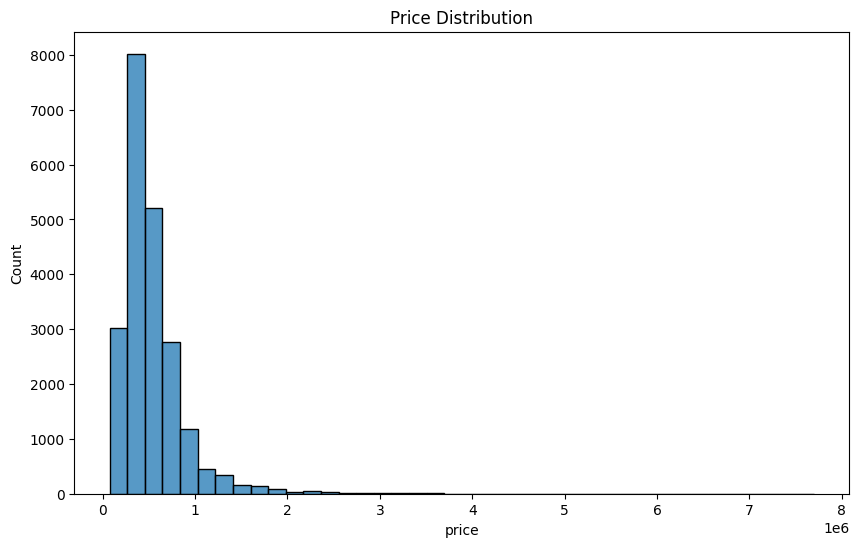

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'],  bins=40)
plt.title('Price Distribution')
plt.show()

The code creates a visualization of price data using a histogram. The histogram displays the frequency of different price values, showing how often each price occurs.
This helps to identify the central tendency, spread, and potential outliers in the prices. You can observe whether the price distribution is normal, skewed, or multimodal, offering insights into patterns or trends in the price data.

#bedrooms

In [ ]:
data.bedrooms.describe()

,bedrooms
count,21613.000000
mean,3.370842
std,0.930062
min,0.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,33.000000


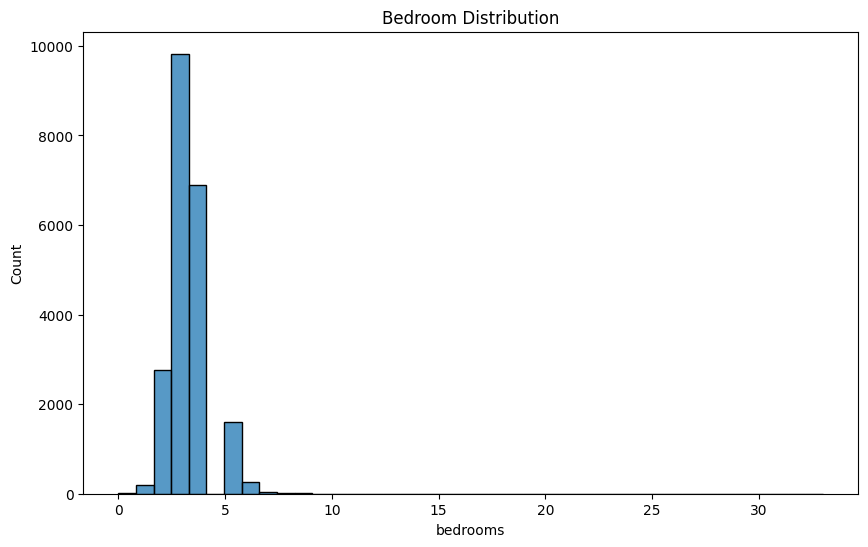

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['bedrooms'],  bins=40)
plt.title('Bedroom Distribution')
plt.show()

#grade

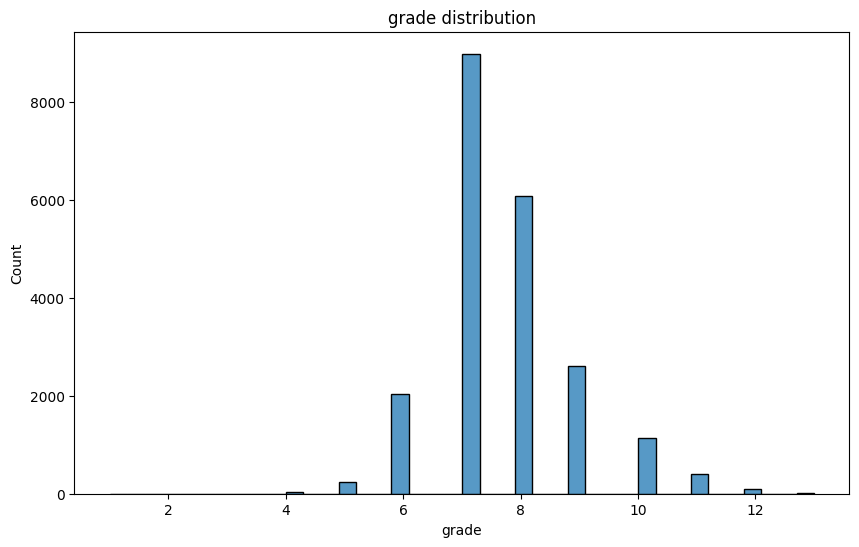

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['grade'],  bins=40)
plt.title('grade distribution')
plt.show()

In the House Sales in King County, USA dataset, the grade column represents the overall construction and design quality of the house, as assessed by the King County grading system. It's a categorical feature with integer values that range from 1 to 13, where higher numbers indicate better quality.

Here is a general breakdown of what the grade values represent:

1-3: Poor or below average construction and design quality.
4-6: Average quality.
7: Good quality (the typical grade for most homes).
8-10: Above average to excellent construction quality.
11-13: Luxury or high-end homes with top-quality construction and design.

#floors

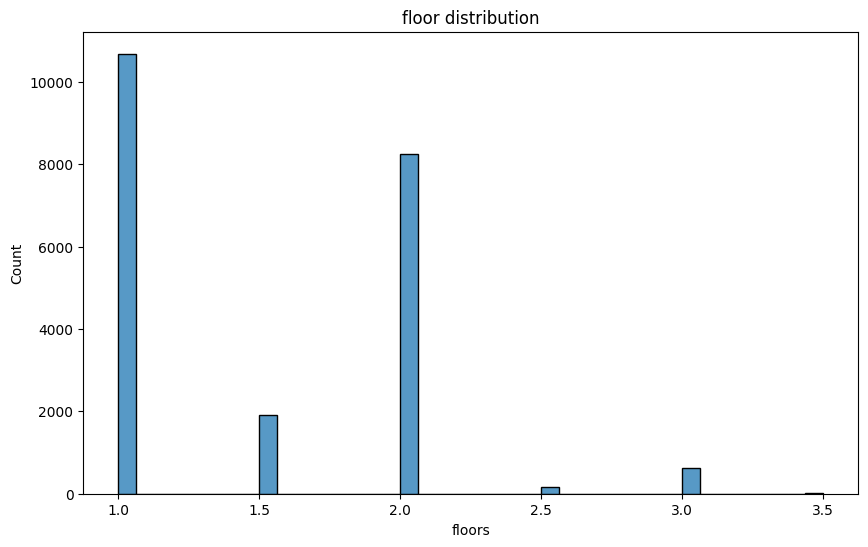

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['floors'],  bins=40)
plt.title('floor distribution')
plt.show()

### Machine Learning

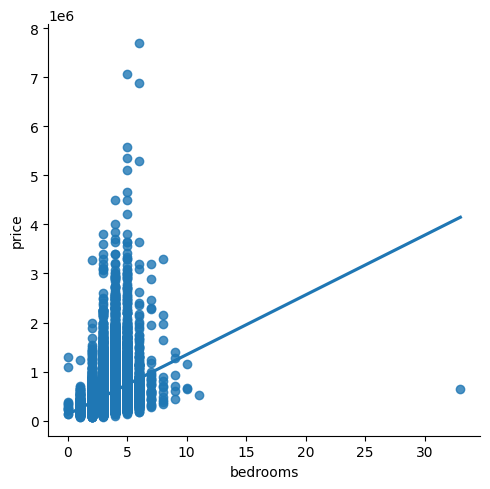

In [ ]:
sns.lmplot(x='bedrooms',y='price',data=data,fit_reg=True, ci=None)

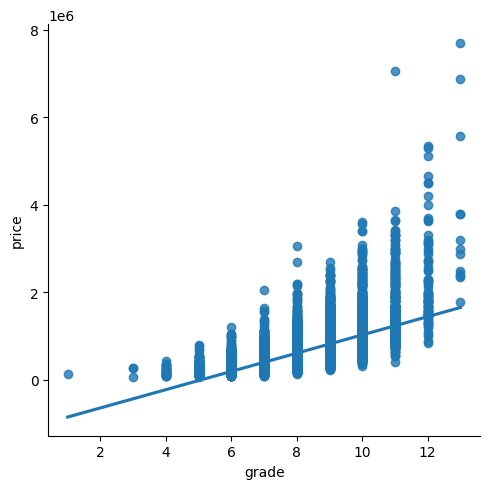

In [ ]:
sns.lmplot(x='grade',y='price',data=data,fit_reg=True, ci=None)

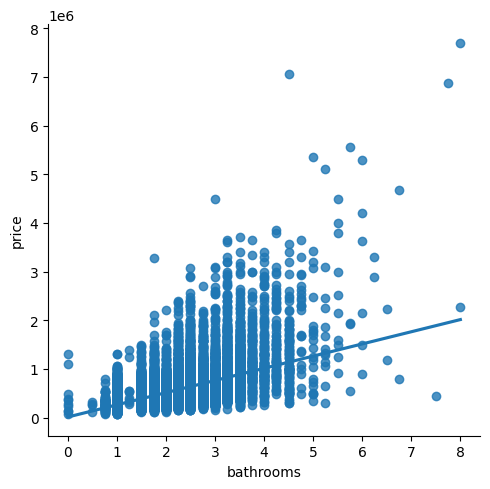

In [ ]:
sns.lmplot(x='bathrooms',y='price',data=data,fit_reg=True, ci=None)

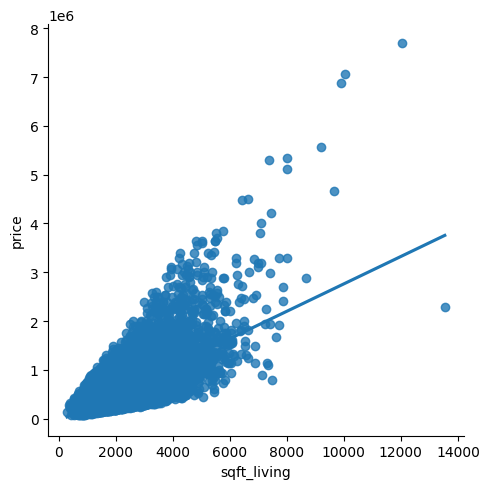

In [ ]:
sns.lmplot(x='sqft_living',y='price',data=data,fit_reg=True, ci=None)

**Linear Regression from Scikit learn**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
input=data[["grade", "sqft_living","bathrooms",'view','floors','bedrooms']]
targets=data.price

In [ ]:
predictors = ["grade", "sqft_living","bathrooms",'view','floors','bedrooms']

In [ ]:
reg.fit(data[predictors], data["price"])

LinearRegression()

In [ ]:
predictions = reg.predict(data[predictors])

In [ ]:
pridictions=reg.predict(input)

In [ ]:
pridictions

array([316617.6940128 , 550116.32740741, 171849.15491662, ...,
       295675.52542038, 450861.57575586, 295675.52542038])

In [ ]:
data["predictions"] = predictions

<ipython-input-45-2f1d61c6772a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["predictions"] = predictions


In [ ]:
data.loc[data["predictions"] < 0, "predictions"] = 0

In [ ]:
data["predictions"] = data["predictions"].round()

<ipython-input-37-3e736aefd329>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["predictions"] = data["predictions"].round()


In [ ]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(data["price"], data["predictions"])
error

156079.34622680795

In [ ]:
data["predictions"] = predictions

<ipython-input-39-2f1d61c6772a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["predictions"] = predictions


In [ ]:
data[data["sqft_living"] ==2570 ]

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,predictions
1,538000.0,3,2.25,2570,2.0,0,7,550116.327407
29,719000.0,4,2.50,2570,2.0,0,8,610634.674650
40,625000.0,4,2.50,2570,2.0,0,9,706187.535365
461,348000.0,3,2.25,2570,2.0,0,8,645669.188122
901,800000.0,4,2.50,2570,1.5,0,10,813934.819896
...,...,...,...,...,...,...,...,...
19839,472000.0,5,2.50,2570,2.0,0,8,578906.527299
19934,339990.0,3,2.50,2570,2.0,0,8,642362.822001
19989,1100000.0,4,2.50,2570,2.0,0,9,706187.535365
21297,492500.0,5,2.50,2570,2.0,0,8,578906.527299
